## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# mouse_metadata

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_number = merge_df["Mouse ID"].count()
mouse_number

1893

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
merge_dup = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
# merge_dup


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# https://www.geeksforgeeks.org/how-to-drop-rows-in-pandas-dataframe-by-index-labels/
merge_clean_df = merge_df.drop([merge_df.index[909], merge_df.index[911], merge_df.index[913], merge_df.index[915], merge_df.index[917]])
merge_clean_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892],
           dtype='int64', length=1888)

In [5]:
#Check for NaNs
merge_clean_df.isnull().values.any()

False

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_number2 = merge_clean_df["Mouse ID"].count()
mouse_number2

1888

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Find means of group
means = merge_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# means

In [9]:
# Find median of group
medians = merge_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
# medians

In [10]:
# Find variance of group
variances = merge_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# variances

In [11]:
# Find standard deviations of group
stds = merge_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
# stds

In [12]:
# Find SEMs of group
sems = merge_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# sems

In [13]:
# Assemble the resulting series into a single summary dataframe.
grouped_summary_df = pd.DataFrame({"Mean": means,
                                  "Median" : medians,
                                  "Variance": variances,
                                  "Standard Deviation" : stds,
                                  "SEM": sems})

grouped_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [64]:
# Group the dataframe
total_data = merge_clean_df.groupby(["Drug Regimen"])
# total_data.count()

In [16]:
# Get the total count of the rows in each regimen
total_count = total_data["Mouse ID"].count()
# total_count

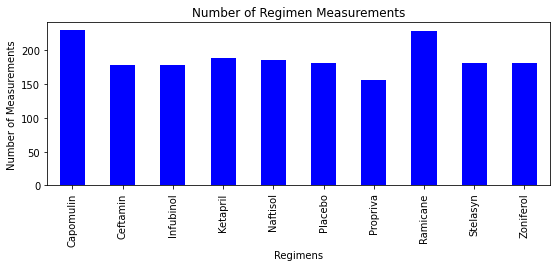

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_count.plot(kind="bar", color="blue", figsize=(9,3), width=0.5)

plt.title("Number of Regimen Measurements")
plt.xlabel("Regimens")
plt.ylabel("Number of Measurements")

plt.show()

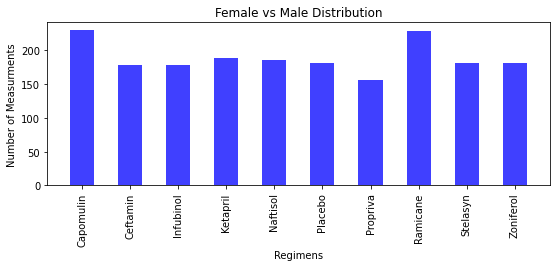

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Can either create the variable for the x-axis by taking grouped_summary_df.index.tolist().
# Or, just get the index of the grouped_summary_df (grouped_summary_df.index)
x_axis = grouped_summary_df.index
y_axis = total_count

plt.figure(figsize=(9,3))

plt.title("Female vs Male Distribution")
plt.xlabel("Regimens")
plt.ylabel("Number of Measurments")

plt.bar(x_axis, y_axis, facecolor="blue", alpha=0.75, align="center", width=0.5)
plt.xticks(x_axis, rotation="vertical")

plt.show()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = merge_clean_df.groupby(["Sex"])
sex_data.count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


In [20]:
sex_count = sex_data["Sex"].count()
sex_count

Sex
Female    930
Male      958
Name: Sex, dtype: int64

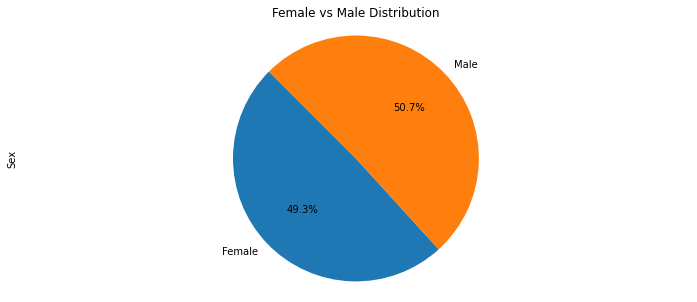

In [21]:
plt.figure(figsize=(12,5))

plt.title("Female vs Male Distribution")
sex_labels= sex_count.index

sex_count.plot(kind="pie", startangle=135, autopct="%1.1f%%", legend=False, labels=sex_labels)

plt.axis("equal") 
plt.show()

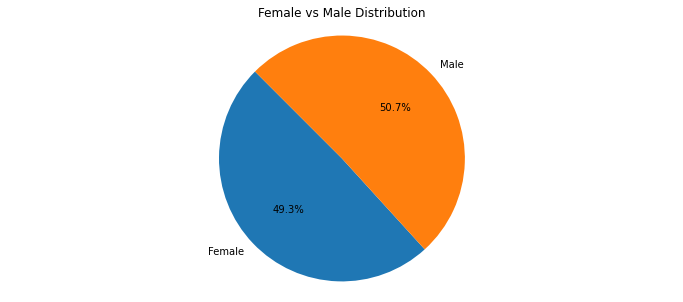

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sex_labels= ["Female", "Male"]
sex_labels= sex_count.index

plt.figure(figsize=(12,5))

plt.title("Female vs Male Distribution")
plt.pie(sex_count, labels=sex_labels, startangle=135, autopct="%1.1f%%")

plt.axis("equal") 
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start with the merged, clean df (original)
merge_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [72]:
# Start by getting the last (greatest) timepoint for each mouse
# Sort this the data by Mouse ID and timepoint
max_timepoint = merge_clean_df.sort_values(["Mouse ID", "Timepoint"], ascending = False)
print(max_timepoint.tail)

max_time = for


<bound method NDFrame.tail of      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1892     z969     Naftisol    Male           9          30         45   
1891     z969     Naftisol    Male           9          30         40   
1890     z969     Naftisol    Male           9          30         35   
1889     z969     Naftisol    Male           9          30         30   
1888     z969     Naftisol    Male           9          30         25   
...       ...          ...     ...         ...         ...        ...   
458      a203    Infubinol  Female          20          23         20   
457      a203    Infubinol  Female          20          23         15   
456      a203    Infubinol  Female          20          23         10   
455      a203    Infubinol  Female          20          23          5   
454      a203    Infubinol  Female          20          23          0   

      Tumor Volume (mm3)  Metastatic Sites  
1892           73.867845                 4  
189

In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [26]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
